#### Import libraries

In [271]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import pandas as pd

#### Import data

In [272]:
df = pd.read_csv("cricketers.csv",sep='\t') 
df.head()

,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,Aaron Finch,10,9,134,46,100,16.75,144.00,0,0.0,0,0,0.0,0.0
1,AB de Villiers,12,11,480,90,275,53.33,174.54,0,0.0,0,0,0.0,0.0
2,Abhishek Sharma,3,3,63,46,33,63.00,190.90,0,0.0,0,0,0.0,0.0
3,Ajinkya Rahane,15,14,370,65,313,28.46,118.21,0,0.0,0,0,0.0,0.0
4,Alex Hales,6,6,148,45,118,24.66,125.42,0,0.0,0,0,0.0,0.0


In [273]:
df.tail()

,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
104,Anureet Singh,0,0,0,0,0,0.0,0.0,3,4.0,42,1,42.00,10.50
105,Avesh Khan,0,0,0,0,0,0.0,0.0,6,19.0,204,4,51.00,10.73
106,Barinder Sran,0,0,0,0,0,0.0,0.0,6,22.0,229,4,57.25,10.40
107,Basil Thampi,0,0,0,0,0,0.0,0.0,4,10.1,114,5,22.80,10.20
108,Ben Laughlin,0,0,0,0,0,0.0,0.0,7,21.0,212,9,22.44,10.04


#### Feature engineering

In [274]:
df.columns

Index(['PLAYER', 'matches_played', 'innings_batted', 'runs_scored',
       'highest_runs', 'balls_faced', 'average_runs', 'strike_rate',
       'innings_bowled', 'overs', 'runs_given', 'wickets_obtained',
       'average_runs_per_wicket ', 'bowling_economy '],
      dtype='object')

In [275]:
df.rename(columns = {'average_runs_per_wicket ':'average_runs_per_wicket', 'bowling_economy ':'bowling_economy'}, inplace = True) 

##### Check for null values 

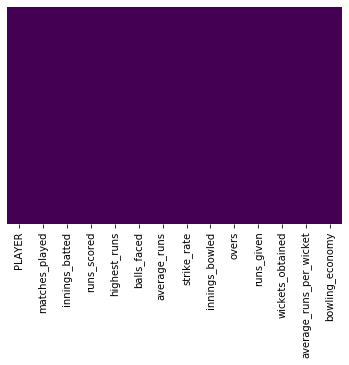

In [276]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

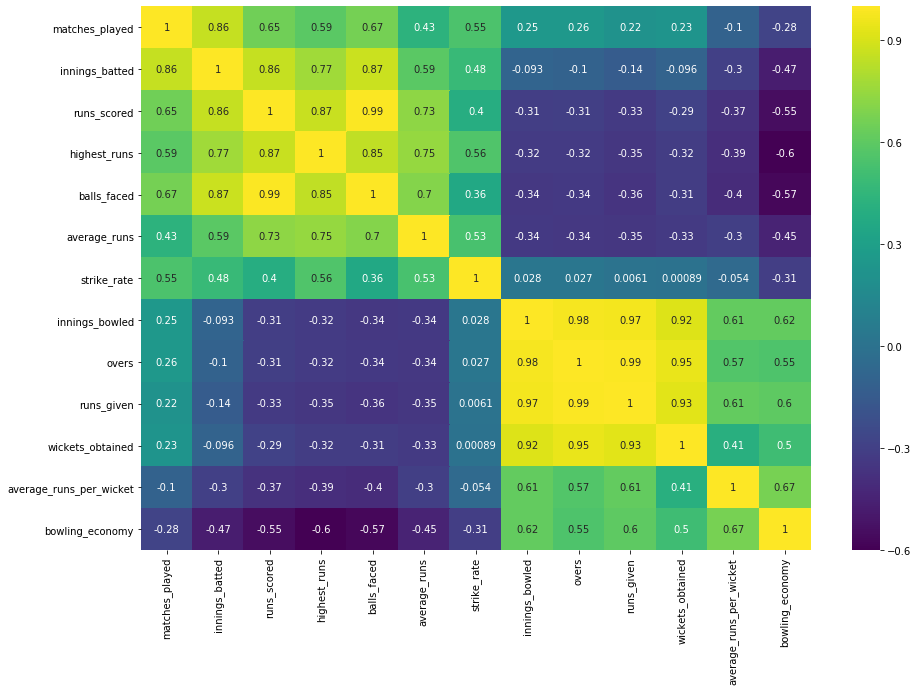

In [277]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

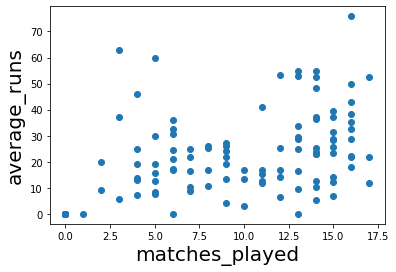

In [278]:
plt.scatter(df['matches_played'],df['average_runs'])
plt.xlabel('matches_played', size = 20)
plt.ylabel('average_runs', size = 20)
plt.show()

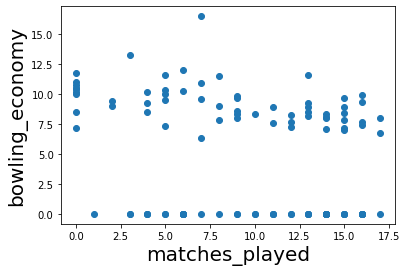

In [279]:
plt.scatter(df['matches_played'],df['bowling_economy'])
plt.xlabel('matches_played', size = 20)
plt.ylabel('bowling_economy', size = 20)
plt.show()

##### Scatter plot for average runs vs bowling economy

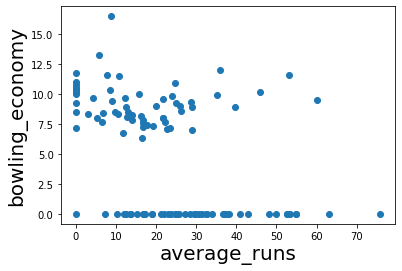

In [280]:
plt.scatter(df['average_runs'],df['bowling_economy'])
plt.xlabel('average_runs', size = 20)
plt.ylabel('bowling_economy', size = 20)
plt.show()

#### Feature Normalization

In [281]:
from sklearn import preprocessing
# normalize the data attributes
df = df.drop(['PLAYER'], axis = 1)
normalized_df = preprocessing.normalize(df)

In [282]:
normalized_df

array([[0.04416418, 0.03974776, 0.59180004, ..., 0.        , 0.        ,
        0.        ],
       [0.02035073, 0.01865483, 0.81402914, ..., 0.        , 0.        ,
        0.        ],
       [0.01374993, 0.01374993, 0.28874847, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.01684861, 0.24114569,
        0.04380638],
       [0.        , 0.        , 0.        , ..., 0.04262017, 0.19434798,
        0.08694515],
       [0.        , 0.        , 0.        , ..., 0.04190838, 0.10449157,
        0.04675113]])

In [283]:
normalized_df.shape

(109, 13)

In [284]:
data_avg_runs_bowl_eco = normalized_df[:, [5, 12]]

In [285]:
data_avg_runs_bowl_eco.shape

(109, 2)

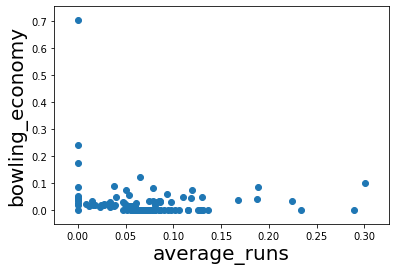

In [286]:
X = data_avg_runs_bowl_eco
plt.scatter(X[:,0], X[:,1])
plt.xlabel('average_runs', size = 20)
plt.ylabel('bowling_economy', size = 20)
plt.show()

#### K-Means clustering from scratch

In [287]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        #k no of cluster
        self.k = k
        #used to decide if optimized or more iterations are required
        self.tol = tol
        #max no of iterations
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            #intialize centroids for k cluster, initialize first k data points
            #as centroids (it could be random also)
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                #Find the Euclidean distance of each point in the data set with the identified K points — cluster centroids.
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                #Assign each data point to the closest centroid using the distance found
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                #Find the new centroid by taking the average of the points in each cluster group
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True
            #Repeat for a fixed number of iteration or till the centroids don’t change.
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    #print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

##### No of cluster (K=2)

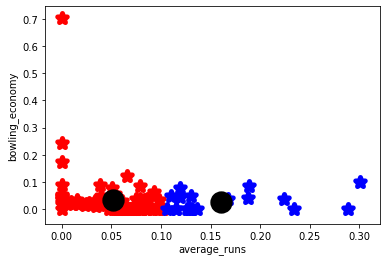

In [296]:
model = K_Means(2)
model.fit(X)
colors=['red', 'blue', 'green', 'orange', 'yellow']

for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="*", color=color, s=100, linewidths=5)
        
for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k", s=300, linewidths=5)
plt.xlabel('average_runs', size = 10)
plt.ylabel('bowling_economy', size = 10)
        
plt.show()

##### No of cluster (K=3)

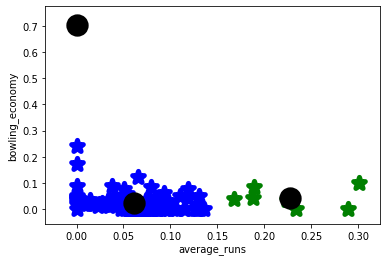

In [300]:
model = K_Means(3)
model.fit(X)

for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="*", color=color, s=150, linewidths=5)
        
for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k", s=300, linewidths=5)
plt.xlabel('average_runs', size = 10)
plt.ylabel('bowling_economy', size = 10)        
plt.show()

##### No of cluster (K=4)

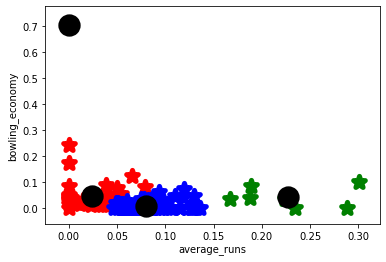

In [299]:
model = K_Means(4)
model.fit(X)

for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="*", color=color, s=150, linewidths=5)
        
for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k", s=300, linewidths=5)
    
plt.xlabel('average_runs', size = 10)
plt.ylabel('bowling_economy', size = 10)        
plt.show()

##### No of cluster (K=5)

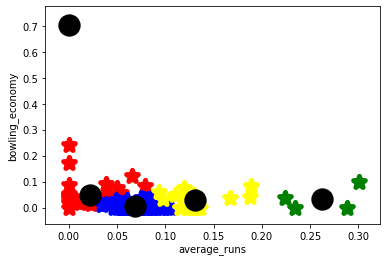

In [297]:
model = K_Means(5)
model.fit(X)

for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="*", color=color, s=150, linewidths=5)
        
for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k", s=300, linewidths=5)
plt.xlabel('average_runs', size = 10)
plt.ylabel('bowling_economy', size = 10)        
plt.show()

#### K-Means scikit learn

In [292]:
from sklearn.cluster import KMeans

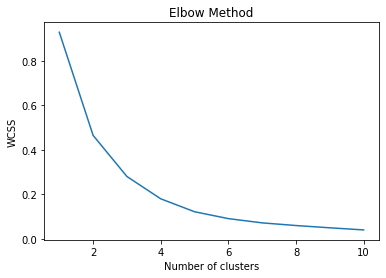

In [293]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

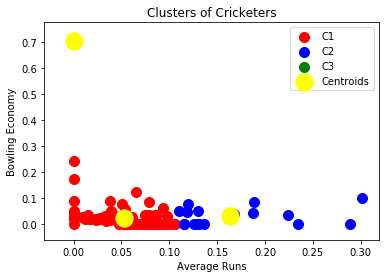

In [294]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'C1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'C2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'C3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Cricketers')
plt.xlabel('Average Runs')
plt.ylabel('Bowling Economy')
plt.legend()
plt.show()

The algorithm begins by randomly assigning each data point to a specific cluster with no one data point being in any two clusters. It then calculates the centroid, or mean of these points. The objective of the algorithm is to reduce the total within-cluster variation through many iterations of the above process.

The approach kmeans follows to solve the problem is called Expectation-Maximization. The E-step is assigning the data points to the closest cluster. The M-step is computing the centroid of each cluster.

Kmeans assumes spherical shapes of clusters (with radius equal to the distance between the centroid and the furthest data point) and doesn’t work well when clusters are in different shapes such as elliptical clusters.

If there is overlapping between clusters, kmeans doesn’t have an intrinsic measure for uncertainty for the examples belong to the overlapping region in order to determine for which cluster to assign each data point.

First, this dot is green so whatever the county that is it belongs to Cluster 3. Notice that there is a gray line for “Firearms and Ammunition Sales” ballot measure that is close to the dot. This means that this county has a high supporting rate for this measure.

On the other hand, the counties that are the opposite end of the “Firearms and Ammunition Sales” ballot measure line can be considered that they have lower values of the supporting rate for this measure. In another word, the counties close to the red line have opposed to the measure.